In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import folium
from folium.plugins import HeatMap
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier


plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
df = pd.read_excel('C:\\Users\\SONY i5\\Downloads\\redi_da\\hotel predict\\archive (1)\\gth boock1.xlsx')
df.head()

,ID,Дата,Статус,Агент,Начало,Конец,Рейс,Отель,Трансфер,Человек,Взр,Дт,Млд,Туристы,Ц К,Ц А,Ц Н,Ц П,Ц О,Ц Т,Ц С,Ц Д,Ост,Комментарий,Unnamed: 24
0,101247,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,IEV-VIE,Apartmenthaus Hietzing 2*,Групповой: VIE - отель / 29.12.2019\nГрупповой...,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,0.00,0.00,1342.41,440.28,839.53,50.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...
1,101248,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,KBP-BTS,Apartmenthaus Hietzing 2*,NaN,2,2,0,0,ADT/MR /\nADT/MR /,0.00,0.00,1132.83,280.70,839.53,0.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...
2,101250,24.12.2019,Підтверджено,Hottours,2019-12-30,2020-01-01,IEV-VIE,Arthotel Ana Boutique Six 4*,Групповой: VIE - отель / 30.12.2019\nГрупповой...,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,437.00,386.73,366.73,146.52,192.96,25.00,2.25,0,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...
3,101255,27.12.2019,Підтверджено,Hottours,2020-02-29,2020-03-14,KBP-INN,Best Western Mondschein 4*,NaN,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1671.26,1478.99,1458.99,323.41,1125.23,0.00,10.35,0,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...
4,101257,31.12.2019,Підтверджено,Hottours,2020-01-05,2020-01-10,KBP-DXB,CALIFORNIA HOTEL 3* CITY,Групповой: DXB - отель / 06.01.2020\nГрупповой...,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1523.01,1347.80,1307.80,1065.84,189.28,43.68,9.00,0,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...


In [139]:
#clean

In [3]:
df.describe()

,ID,Человек,Взр,Дт,Млд,Ц К,Ц А,Ц Н,Ц П,Ц О,Ц Т,Ц С,Ц Д,Ост
count,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.0,2444.000000
mean,102475.247136,2.177169,2.099018,0.073650,0.004501,596.045524,543.569597,621.259490,328.646696,267.180192,14.237348,11.182979,0.0,37.356207
std,706.000076,1.137009,1.087276,0.325441,0.066951,1016.234845,914.040799,2306.616736,259.360758,2293.935075,29.094818,9.747045,0.0,185.032218
min,101247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.700000,0.000000,0.000000,0.000000,0.000000,0.0,-1247.800000
25%,101864.750000,2.000000,2.000000,0.000000,0.000000,300.000000,290.640000,320.000000,220.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,102475.500000,2.000000,2.000000,0.000000,0.000000,480.000000,431.250000,447.120000,290.000000,83.535000,10.000000,12.000000,0.0,0.000000
75%,103086.250000,2.000000,2.000000,0.000000,0.000000,699.000000,636.987500,640.000000,340.000000,234.560000,20.000000,16.000000,0.0,0.000000
max,103697.000000,12.000000,9.000000,6.000000,1.000000,23909.000000,20863.000000,110874.500000,3581.590000,110874.500000,822.470220,64.000000,0.0,2279.140000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2444 non-null   int64  
 1   Дата         2444 non-null   object 
 2   Статус       2444 non-null   object 
 3   Агент        2443 non-null   object 
 4   Начало       2444 non-null   object 
 5   Конец        2439 non-null   object 
 6   Рейс         2363 non-null   object 
 7   Отель        1713 non-null   object 
 8   Трансфер     1613 non-null   object 
 9   Человек      2444 non-null   int64  
 10  Взр          2444 non-null   int64  
 11  Дт           2444 non-null   int64  
 12  Млд          2444 non-null   int64  
 13  Туристы      2439 non-null   object 
 14  Ц К          2444 non-null   float64
 15  Ц А          2444 non-null   float64
 16  Ц Н          2444 non-null   float64
 17  Ц П          2444 non-null   float64
 18  Ц О          2444 non-null   float64
 19  Ц Т   

In [5]:
df['Рейс'] = df['Рейс'].str.split('-').str[1]
df.head()

,ID,Дата,Статус,Агент,Начало,Конец,Рейс,Отель,Трансфер,Человек,Взр,Дт,Млд,Туристы,Ц К,Ц А,Ц Н,Ц П,Ц О,Ц Т,Ц С,Ц Д,Ост,Комментарий,Unnamed: 24
0,101247,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,VIE,Apartmenthaus Hietzing 2*,Групповой: VIE - отель / 29.12.2019\nГрупповой...,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,0.00,0.00,1342.41,440.28,839.53,50.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...
1,101248,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,BTS,Apartmenthaus Hietzing 2*,NaN,2,2,0,0,ADT/MR /\nADT/MR /,0.00,0.00,1132.83,280.70,839.53,0.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...
2,101250,24.12.2019,Підтверджено,Hottours,2019-12-30,2020-01-01,VIE,Arthotel Ana Boutique Six 4*,Групповой: VIE - отель / 30.12.2019\nГрупповой...,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,437.00,386.73,366.73,146.52,192.96,25.00,2.25,0,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...
3,101255,27.12.2019,Підтверджено,Hottours,2020-02-29,2020-03-14,INN,Best Western Mondschein 4*,NaN,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1671.26,1478.99,1458.99,323.41,1125.23,0.00,10.35,0,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...
4,101257,31.12.2019,Підтверджено,Hottours,2020-01-05,2020-01-10,DXB,CALIFORNIA HOTEL 3* CITY,Групповой: DXB - отель / 06.01.2020\nГрупповой...,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1523.01,1347.80,1307.80,1065.84,189.28,43.68,9.00,0,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...


In [6]:
airport_countries = {
    "VIE": "Austria", "BTS": "Slovakia", "INN": "Austria", "DXB": "United Arab Emirates",
    "PUJ": "Dominican Republic", "LIS": "Portugal", "DPS": "Indonesia", "CMB": "Sri Lanka",
    "GIG": "Brazil", "IST": "Turkey", "WAW": "Poland", "SKG": "Greece", "BJV": "Turkey",
    "VNO": "Lithuania", "NAN": "Fiji", "RIX": "Latvia", "JED": "Saudi Arabia", "ZIA": "Russia",
    "SAW": "Turkey", "AYT": "Turkey", "ZNZ": "Tanzania", "MLE": "Maldives", "ESB": "Turkey",
    "ASR": "Turkey", "SHJ": "United Arab Emirates", "RMF": "Egypt", "NAV": "Turkey",
    "FRA": "Germany", "ODS": "Ukraine", "KBP": "Ukraine", "DLM": "Turkey", "TBS": "Georgia",
    "ADB": "Turkey", "SPU": "Croatia", "PUY": "Croatia", "LWO": "Ukraine", "SVO": "Russia"
}

In [7]:
index = df.columns.get_loc('Рейс')
if 'Country' in df.columns:
    df.drop(columns=['Country'], inplace=True)
df.insert(index + 1, 'Country', df['Рейс'].map(airport_countries))
df.head()

,ID,Дата,Статус,Агент,Начало,Конец,Рейс,Country,Отель,Трансфер,Человек,Взр,Дт,Млд,Туристы,Ц К,Ц А,Ц Н,Ц П,Ц О,Ц Т,Ц С,Ц Д,Ост,Комментарий,Unnamed: 24
0,101247,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,VIE,Austria,Apartmenthaus Hietzing 2*,Групповой: VIE - отель / 29.12.2019\nГрупповой...,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,0.00,0.00,1342.41,440.28,839.53,50.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...
1,101248,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,BTS,Slovakia,Apartmenthaus Hietzing 2*,NaN,2,2,0,0,ADT/MR /\nADT/MR /,0.00,0.00,1132.83,280.70,839.53,0.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...
2,101250,24.12.2019,Підтверджено,Hottours,2019-12-30,2020-01-01,VIE,Austria,Arthotel Ana Boutique Six 4*,Групповой: VIE - отель / 30.12.2019\nГрупповой...,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,437.00,386.73,366.73,146.52,192.96,25.00,2.25,0,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...
3,101255,27.12.2019,Підтверджено,Hottours,2020-02-29,2020-03-14,INN,Austria,Best Western Mondschein 4*,NaN,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1671.26,1478.99,1458.99,323.41,1125.23,0.00,10.35,0,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...
4,101257,31.12.2019,Підтверджено,Hottours,2020-01-05,2020-01-10,DXB,United Arab Emirates,CALIFORNIA HOTEL 3* CITY,Групповой: DXB - отель / 06.01.2020\nГрупповой...,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1523.01,1347.80,1307.80,1065.84,189.28,43.68,9.00,0,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...


In [8]:
df['price per per'] = df['Ц Н'] / df['Человек']
index_c_n = df.columns.get_loc('Ц Н')
df.head()

,ID,Дата,Статус,Агент,Начало,Конец,Рейс,Country,Отель,Трансфер,Человек,Взр,Дт,Млд,Туристы,Ц К,Ц А,Ц Н,Ц П,Ц О,Ц Т,Ц С,Ц Д,Ост,Комментарий,Unnamed: 24,price per per
0,101247,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,VIE,Austria,Apartmenthaus Hietzing 2*,Групповой: VIE - отель / 29.12.2019\nГрупповой...,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,0.00,0.00,1342.41,440.28,839.53,50.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,1342.410
1,101248,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,BTS,Slovakia,Apartmenthaus Hietzing 2*,NaN,2,2,0,0,ADT/MR /\nADT/MR /,0.00,0.00,1132.83,280.70,839.53,0.00,12.60,0,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,566.415
2,101250,24.12.2019,Підтверджено,Hottours,2019-12-30,2020-01-01,VIE,Austria,Arthotel Ana Boutique Six 4*,Групповой: VIE - отель / 30.12.2019\nГрупповой...,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,437.00,386.73,366.73,146.52,192.96,25.00,2.25,0,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...,366.730
3,101255,27.12.2019,Підтверджено,Hottours,2020-02-29,2020-03-14,INN,Austria,Best Western Mondschein 4*,NaN,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1671.26,1478.99,1458.99,323.41,1125.23,0.00,10.35,0,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...,1458.990
4,101257,31.12.2019,Підтверджено,Hottours,2020-01-05,2020-01-10,DXB,United Arab Emirates,CALIFORNIA HOTEL 3* CITY,Групповой: DXB - отель / 06.01.2020\nГрупповой...,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1523.01,1347.80,1307.80,1065.84,189.28,43.68,9.00,0,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...,653.900


In [9]:
df_1 = df.drop(columns=['Рейс', 'Трансфер', 'Ц К', 'Ц А', 'Ц П', 'Ц О', 'Ц Т', 'Ц С', 'Ц Д'])
df_1.head()

,ID,Дата,Статус,Агент,Начало,Конец,Country,Отель,Человек,Взр,Дт,Млд,Туристы,Ц Н,Ост,Комментарий,Unnamed: 24,price per per
0,101247,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,Austria,Apartmenthaus Hietzing 2*,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,1342.41,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,1342.410
1,101248,17.12.2019,Відмова,Hottours,2019-12-29,2020-01-06,Slovakia,Apartmenthaus Hietzing 2*,2,2,0,0,ADT/MR /\nADT/MR /,1132.83,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,566.415
2,101250,24.12.2019,Підтверджено,Hottours,2019-12-30,2020-01-01,Austria,Arthotel Ana Boutique Six 4*,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,366.73,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...,366.730
3,101255,27.12.2019,Підтверджено,Hottours,2020-02-29,2020-03-14,Austria,Best Western Mondschein 4*,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1458.99,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...,1458.990
4,101257,31.12.2019,Підтверджено,Hottours,2020-01-05,2020-01-10,United Arab Emirates,CALIFORNIA HOTEL 3* CITY,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1307.80,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...,653.900


In [10]:
# "Статус"
status_mapping = {'Відмова': 0, 'Анульовано': 0, 'Підтверджено': 1, 'На розгляді': 1, 'Депонування': 1, 'У роботі': 1}
df_1['Статус'] = df_1['Статус'].replace(status_mapping)
df_1.head()

,ID,Дата,Статус,Агент,Начало,Конец,Country,Отель,Человек,Взр,Дт,Млд,Туристы,Ц Н,Ост,Комментарий,Unnamed: 24,price per per
0,101247,17.12.2019,0,Hottours,2019-12-29,2020-01-06,Austria,Apartmenthaus Hietzing 2*,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,1342.41,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,1342.410
1,101248,17.12.2019,0,Hottours,2019-12-29,2020-01-06,Slovakia,Apartmenthaus Hietzing 2*,2,2,0,0,ADT/MR /\nADT/MR /,1132.83,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,566.415
2,101250,24.12.2019,1,Hottours,2019-12-30,2020-01-01,Austria,Arthotel Ana Boutique Six 4*,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,366.73,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...,366.730
3,101255,27.12.2019,1,Hottours,2020-02-29,2020-03-14,Austria,Best Western Mondschein 4*,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1458.99,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...,1458.990
4,101257,31.12.2019,1,Hottours,2020-01-05,2020-01-10,United Arab Emirates,CALIFORNIA HOTEL 3* CITY,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1307.80,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...,653.900


In [11]:
df_1['Дата'] = pd.to_datetime(df_1['Дата'], format='%d.%m.%Y', errors='coerce') 
df_1['Начало'] = pd.to_datetime(df_1['Начало'], format='%Y-%m-%d', errors='coerce')
df_1['Конец'] = pd.to_datetime(df_1['Конец'], format='%Y-%m-%d', errors='coerce')
print(df_1[df_1['Начало'].isna()])


          ID       Дата  Статус  \
1036  102290 2021-03-20       0   
1037  102291 2021-03-20       0   
1038  102292 2021-03-20       0   
1039  102293 2021-03-20       0   
1077  102331 2021-03-22       0   
1173  102427 2021-03-24       1   

                                                  Агент Начало      Конец  \
1036                            ТОВ "Глобал Тревел Хаб"    NaT        NaT   
1037                            ТОВ "Глобал Тревел Хаб"    NaT        NaT   
1038                            ТОВ "Глобал Тревел Хаб"    NaT        NaT   
1039                            ТОВ "Глобал Тревел Хаб"    NaT        NaT   
1077  Товариство з обмеженою відповідальністю «Герме...    NaT        NaT   
1173                   ФОП Бєсєдіна Ольга Володимирівна    NaT 2021-05-09   

     Country                                              Отель  Человек  Взр  \
1036  Turkey                                                NaN        2    2   
1037  Turkey                                        

In [12]:
df_1 = df_1.dropna(subset=['Начало'])
df_1 = df_1.dropna(subset=['Дата'])
df_1 = df_1.dropna(subset=['Конец'])

In [13]:
df_1['Deep of sales'] = (df_1['Начало'] - df_1['Дата']).dt.days

index_of_start = df_1.columns.get_loc('Начало')

df_1.insert(index_of_start, 'Deep of sales', df_1.pop('Deep of sales'))
df_1.head()

,ID,Дата,Статус,Агент,Deep of sales,Начало,Конец,Country,Отель,Человек,Взр,Дт,Млд,Туристы,Ц Н,Ост,Комментарий,Unnamed: 24,price per per
0,101247,2019-12-17,0,Hottours,12,2019-12-29,2020-01-06,Austria,Apartmenthaus Hietzing 2*,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,1342.41,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,1342.410
1,101248,2019-12-17,0,Hottours,12,2019-12-29,2020-01-06,Slovakia,Apartmenthaus Hietzing 2*,2,2,0,0,ADT/MR /\nADT/MR /,1132.83,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,566.415
2,101250,2019-12-24,1,Hottours,6,2019-12-30,2020-01-01,Austria,Arthotel Ana Boutique Six 4*,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,366.73,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...,366.730
3,101255,2019-12-27,1,Hottours,64,2020-02-29,2020-03-14,Austria,Best Western Mondschein 4*,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1458.99,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...,1458.990
4,101257,2019-12-31,1,Hottours,5,2020-01-05,2020-01-10,United Arab Emirates,CALIFORNIA HOTEL 3* CITY,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1307.80,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...,653.900


In [14]:
df_1['Duration'] = (df_1['Конец'] - df_1['Начало']).dt.days
index_of_start = df_1.columns.get_loc('Конец')
df_1.insert(index_of_start +1, 'Duration', df_1.pop('Duration'))
df_1.head()

,ID,Дата,Статус,Агент,Deep of sales,Начало,Конец,Duration,Country,Отель,Человек,Взр,Дт,Млд,Туристы,Ц Н,Ост,Комментарий,Unnamed: 24,price per per
0,101247,2019-12-17,0,Hottours,12,2019-12-29,2020-01-06,8,Austria,Apartmenthaus Hietzing 2*,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,1342.41,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,1342.410
1,101248,2019-12-17,0,Hottours,12,2019-12-29,2020-01-06,8,Slovakia,Apartmenthaus Hietzing 2*,2,2,0,0,ADT/MR /\nADT/MR /,1132.83,0.0,NaN,Вена / Apartmenthaus Hietzing 2* / Standard Ap...,566.415
2,101250,2019-12-24,1,Hottours,6,2019-12-30,2020-01-01,2,Austria,Arthotel Ana Boutique Six 4*,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,366.73,0.0,NaN,Вена / Arthotel Ana Boutique Six 4* / Room Twi...,366.730
3,101255,2019-12-27,1,Hottours,64,2020-02-29,2020-03-14,14,Austria,Best Western Mondschein 4*,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1458.99,0.0,NaN,Инсбрук / Best Western Mondschein 4* / Classic...,1458.990
4,101257,2019-12-31,1,Hottours,5,2020-01-05,2020-01-10,5,United Arab Emirates,CALIFORNIA HOTEL 3* CITY,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1307.80,0.0,NaN,Дубай(Dubai) / CALIFORNIA HOTEL 3* CITY / STAN...,653.900


In [ ]:
#table done

In [15]:
df_2 = df_1.copy()

In [16]:
missing_values = df['Country'].isnull().sum()
print("Количество пропущенных значений в столбце 'Country':", missing_values)

Количество пропущенных значений в столбце 'Country': 81


In [17]:
non_missing_values = df['Country'].notnull().sum()
print("Количество непустых значений в столбце 'Country':", non_missing_values)

Количество непустых значений в столбце 'Country': 2363


In [18]:
df_2 = df_2.dropna(subset=['Country'])

In [19]:
null = pd.DataFrame({'Null Values' : df_2.isna().sum(), 'Percentage Null Values' : (df_2.isna().sum()) / (df_2.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
ID,0,0.000000
Дата,0,0.000000
Статус,0,0.000000
Агент,1,0.042445
Deep of sales,0,0.000000
Начало,0,0.000000
Конец,0,0.000000
Duration,0,0.000000
Country,0,0.000000
Отель,719,30.517827


In [21]:
df_2.fillna(0, inplace = True)

In [22]:
null = pd.DataFrame({'Null Values' : df_2.isna().sum(), 'Percentage Null Values' : (df_2.isna().sum()) / (df_2.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
ID,0,0.0
Дата,0,0.0
Статус,0,0.0
Агент,0,0.0
Deep of sales,0,0.0
Начало,0,0.0
Конец,0,0.0
Duration,0,0.0
Country,0,0.0
Отель,0,0.0


In [23]:
country_wise_guests_concel = df_2[df_2['Статус'] == 0]['Агент'].value_counts().reset_index()
country_wise_guests_concel.columns = ['Человек', 'No of guests']
country_wise_guests_concel

,Человек,No of guests
0,"ТОВ ""Глобал Тревел Хаб""",96
1,"ТОВ ""АЛЬФ ТУРИСТИЧНИЙ ОПЕРАТОР""",19
2,Hottours,13
3,ТОВ Тревел Профешнл Груп,12
4,"ТОВ ""ТТВК""",11
...,...,...
132,ФОП Вуйко Анастасія Віталіївна,1
133,ФОП Огурцова И.Е.,1
134,ТОВ Індіана Тревел,1
135,ФОП Волокіта Ю.М.,1


In [24]:
country_wise_guests_done = df_2[df_2['Статус'] == 1]['Агент'].value_counts().reset_index()
country_wise_guests_done.columns = ['Человек', 'No of guests']
country_wise_guests_done

,Человек,No of guests
0,"ТОВ ""АЛЬФ ТУРИСТИЧНИЙ ОПЕРАТОР""",152
1,ТОВ Тревел Профешнл Груп,81
2,Hottours,69
3,ТОВ Юкрейніан Глобал Компані,64
4,"ТОВ ""ТТВК""",62
...,...,...
533,"ТОВ ""Саквояж""",1
534,ФОП Благодір А.І.,1
535,ТОВ Новатур,1
536,ФОП Боцвинок Іван Юрійович,1


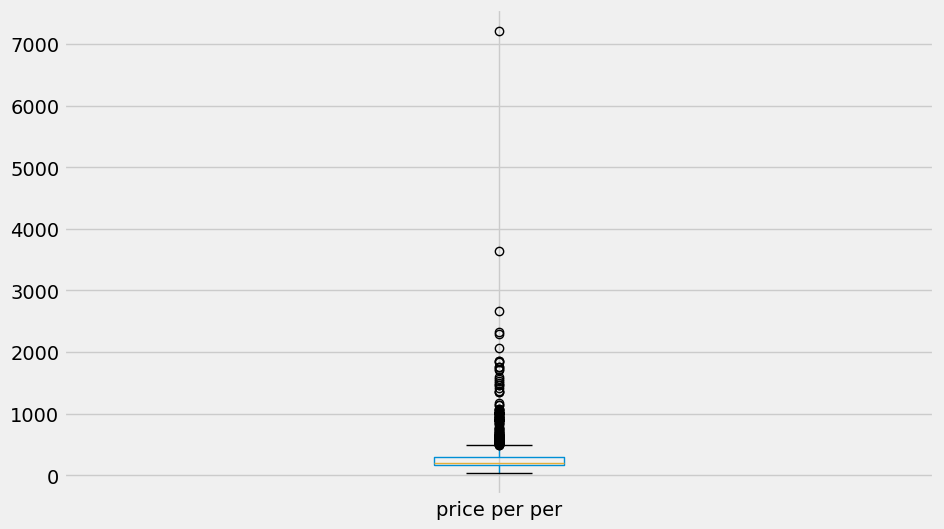

In [28]:
plt.figure(figsize=(10, 6))
df_2.boxplot(column=['price per per']) 
plt.show()

In [26]:
Q1 = df_2['price per per'].quantile(0.25)
Q3 = df_2['price per per'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_2[(df_2['price per per'] < lower_bound) | (df_2['price per per'] > upper_bound)]
print("Выбросы находятся в следующих строках:")
print(outliers)

Выбросы находятся в следующих строках:
          ID       Дата  Статус                  Агент  Deep of sales  \
0     101247 2019-12-17       0               Hottours             12   
1     101248 2019-12-17       0               Hottours             12   
3     101255 2019-12-27       1               Hottours             64   
4     101257 2019-12-31       1               Hottours              5   
6     101259 2020-01-05       1               Hottours              8   
...      ...        ...     ...                    ...            ...   
2405  103659 2021-05-26       1  ТОВ "Сузір’я Туризму"             47   
2416  103670 2021-05-31       1         ПП Траффік-Тур              3   
2417  103671 2021-05-31       1         ПП Траффік-Тур              3   
2419  103673 2021-05-31       0        ТОВ "МАРІНЕЛЛА"              3   
2432  103686 2021-06-05       1     ТОВ "Відпустка Ок"             12   

         Начало      Конец  Duration               Country  \
0    2019-12-29 2020-0

In [27]:
outlier_indices = [0, 1, 3, 4, 6, 2405, 2416, 2417, 2419, 2432]

df_cleaned = df_2.drop(outlier_indices, axis=0)

df_cleaned.reset_index(drop=True, inplace=True)

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 0 to 2443
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             2356 non-null   int64         
 1   Дата           2356 non-null   datetime64[ns]
 2   Статус         2356 non-null   int64         
 3   Агент          2356 non-null   object        
 4   Deep of sales  2356 non-null   int64         
 5   Начало         2356 non-null   datetime64[ns]
 6   Конец          2356 non-null   datetime64[ns]
 7   Duration       2356 non-null   int64         
 8   Country        2356 non-null   object        
 9   Отель          2356 non-null   object        
 10  Человек        2356 non-null   int64         
 11  Взр            2356 non-null   int64         
 12  Дт             2356 non-null   int64         
 13  Млд            2356 non-null   int64         
 14  Туристы        2356 non-null   object        
 15  Ц Н            2356 non-nu

In [32]:
df_2.shape[0]

2356

In [33]:
data = df_2[df_2['Статус'] == 1]

px.box(data_frame = data, x = 'Country', y = 'price per per', color = 'Агент', template = 'plotly_dark')

In [34]:
data = df_2[df_2['Статус'] == 0]

px.box(data_frame = data, x = 'Country', y = 'price per per', color = 'Агент', template = 'plotly_dark')

In [35]:
missing_values_count = df_2['Country'].isna().sum()
print("Количество пропущенных значений в столбце 'Country':", missing_values_count)

print("Уникальные значения в столбце 'Country':", df_2['Country'].unique())

Количество пропущенных значений в столбце 'Country': 0
Уникальные значения в столбце 'Country': ['Austria' 'Slovakia' 'United Arab Emirates' 'Dominican Republic'
 'Portugal' 'Indonesia' 'Sri Lanka' 'Brazil' 'Turkey' 'Poland' 'Greece'
 'Lithuania' 'Fiji' 'Latvia' 'Saudi Arabia' 'Russia' 'Tanzania' 'Maldives'
 'Egypt' 'Germany' 'Ukraine' 'Georgia' 'Croatia']


In [36]:
df_2['Начало'] = pd.to_datetime(df_2['Начало'])
df_2['month'] = df_2['Начало'].dt.month_name()
result = df_2.groupby('month')['price per per'].mean().reset_index()
print(result)

        month  price per per
0       April     243.235142
1      August     181.352500
2    December     353.511698
3    February            inf
4     January     713.346123
5        July     692.058000
6        June     368.406266
7       March     327.535165
8         May            inf
9    November     608.759703
10    October     347.459955
11  September     343.715000


In [37]:
monthly_country_prices = df_2.groupby(['Country', 'month'])['price per per'].mean().reset_index()

In [38]:
final_hotel = monthly_country_prices.pivot(index='Country', columns='month', values='price per per')

In [39]:
print(final_hotel)

month                       April   August    December     February  \
Country                                                               
Austria                       NaN      NaN  854.570000   849.242500   
Brazil                        NaN      NaN         NaN  1300.230000   
Croatia                       NaN      NaN         NaN          NaN   
Dominican Republic            NaN      NaN         NaN          NaN   
Egypt                         NaN      NaN  468.220000          NaN   
Fiji                          NaN      NaN         NaN  2289.665000   
Georgia                489.045000      NaN         NaN          NaN   
Germany                       NaN      NaN         NaN   114.000000   
Greece                        NaN      NaN         NaN    65.490000   
Indonesia                     NaN      NaN         NaN          NaN   
Latvia                 118.170000      NaN         NaN          NaN   
Lithuania                     NaN      NaN         NaN    83.000000   
Maldiv

In [40]:

fig = px.bar(monthly_country_prices, x='month', y='price per per', color='Country',
              title='Pakege rate per person ',
              template='plotly_dark')

fig.show()

In [41]:
monthly_guests = df_2.groupby('month')['Человек'].sum().reset_index()

In [42]:
fig = px.bar(monthly_guests, x='month', y='Человек',
              title='People per Month',
              labels={'Человек': 'Number of Guests'},  # Переименование оси Y для большей ясности
              template='plotly_dark')

fig.show()

In [ ]:
#================

In [43]:
df_3 = df_2.copy()

In [44]:
unique_countries = df_3['Country'].unique()
print(unique_countries)

['Austria' 'Slovakia' 'United Arab Emirates' 'Dominican Republic'
 'Portugal' 'Indonesia' 'Sri Lanka' 'Brazil' 'Turkey' 'Poland' 'Greece'
 'Lithuania' 'Fiji' 'Latvia' 'Saudi Arabia' 'Russia' 'Tanzania' 'Maldives'
 'Egypt' 'Germany' 'Ukraine' 'Georgia' 'Croatia']


In [45]:
df_3 = pd.get_dummies(df_3, columns=['Country'])

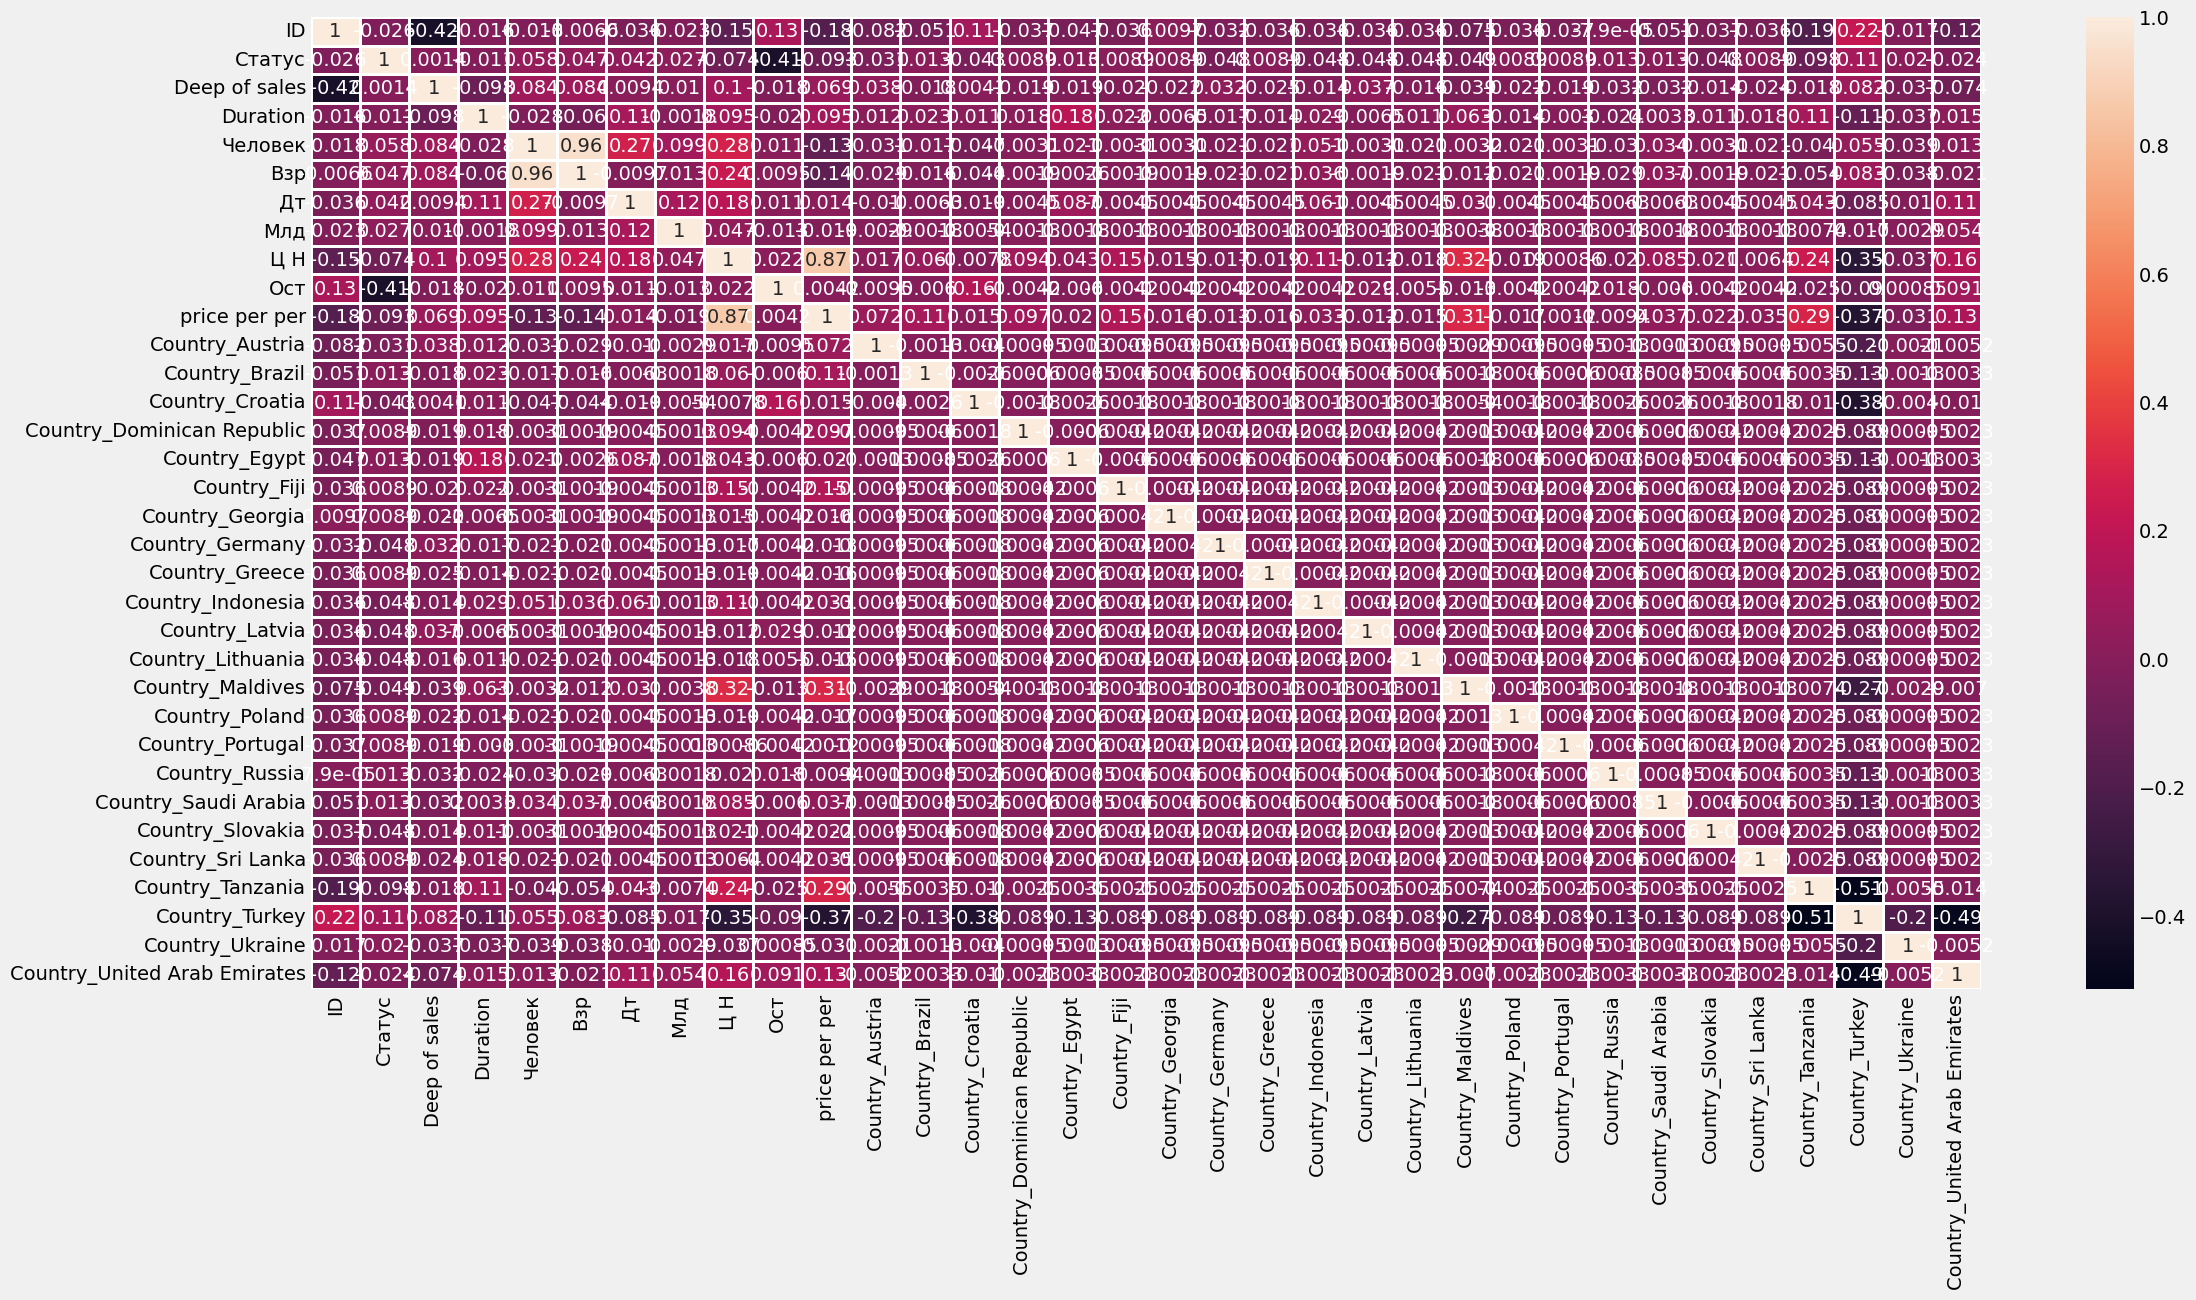

In [46]:
plt.figure(figsize = (24, 12))

corr = df_3.corr(numeric_only=True)
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [47]:
df_3.head()

,ID,Дата,Статус,Агент,Deep of sales,Начало,Конец,Duration,Отель,Человек,Взр,Дт,Млд,Туристы,Ц Н,Ост,...,Country_Germany,Country_Greece,Country_Indonesia,Country_Latvia,Country_Lithuania,Country_Maldives,Country_Poland,Country_Portugal,Country_Russia,Country_Saudi Arabia,Country_Slovakia,Country_Sri Lanka,Country_Tanzania,Country_Turkey,Country_Ukraine,Country_United Arab Emirates
0,101247,2019-12-17,0,Hottours,12,2019-12-29,2020-01-06,8,Apartmenthaus Hietzing 2*,1,1,0,0,ADT/MR DOE JOHN/22.02.1990,1342.41,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,101248,2019-12-17,0,Hottours,12,2019-12-29,2020-01-06,8,Apartmenthaus Hietzing 2*,2,2,0,0,ADT/MR /\nADT/MR /,1132.83,0.0,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,101250,2019-12-24,1,Hottours,6,2019-12-30,2020-01-01,2,Arthotel Ana Boutique Six 4*,1,1,0,0,ADT/MR SOLTANOV VITALII/30.10.1952,366.73,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,101255,2019-12-27,1,Hottours,64,2020-02-29,2020-03-14,14,Best Western Mondschein 4*,1,1,0,0,ADT/MS ZUPANETS KATERYNA/14.12.1982,1458.99,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,101257,2019-12-31,1,Hottours,5,2020-01-05,2020-01-10,5,CALIFORNIA HOTEL 3* CITY,2,2,0,0,ADT/MR ARTEMENKO VITALII/01.10.1991\nADT/MS AR...,1307.80,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [48]:
df_3['Статус_1'] = (df_3['Статус'] == 1).astype(int)
df_3['Статус_0'] = (df_3['Статус'] == 0).astype(int)

In [49]:
correlation = df_3.corr(numeric_only=True)['Статус_0'].abs().sort_values(ascending = False)
correlation

Статус_0                        1.000000
Статус                          1.000000
Статус_1                        1.000000
Ост                             0.410868
Country_Turkey                  0.107716
Country_Tanzania                0.097949
price per per                   0.092747
Ц Н                             0.074002
Человек                         0.058285
Country_Maldives                0.049167
Country_Slovakia                0.047895
Country_Germany                 0.047895
Country_Indonesia               0.047895
Country_Lithuania               0.047895
Country_Latvia                  0.047895
Взр                             0.047298
Country_Croatia                 0.042812
Дт                              0.041534
Country_Austria                 0.030970
Млд                             0.026643
ID                              0.026181
Country_United Arab Emirates    0.024130
Country_Ukraine                 0.019841
Country_Egypt                   0.012541
Country_Brazil  

In [50]:
useless_col = ['Статус', 'Дата', 'Начало', 'Конец', 'Отель', 'Туристы','Unnamed: 24', 'month','Комментарий']

df_3.drop(useless_col, axis = 1, inplace = True)

In [51]:
df_3.head()

,ID,Агент,Deep of sales,Duration,Человек,Взр,Дт,Млд,Ц Н,Ост,price per per,Country_Austria,Country_Brazil,Country_Croatia,Country_Dominican Republic,Country_Egypt,...,Country_Indonesia,Country_Latvia,Country_Lithuania,Country_Maldives,Country_Poland,Country_Portugal,Country_Russia,Country_Saudi Arabia,Country_Slovakia,Country_Sri Lanka,Country_Tanzania,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Статус_1,Статус_0
0,101247,Hottours,12,8,1,1,0,0,1342.41,0.0,1342.410,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1
1,101248,Hottours,12,8,2,2,0,0,1132.83,0.0,566.415,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1
2,101250,Hottours,6,2,1,1,0,0,366.73,0.0,366.730,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0
3,101255,Hottours,64,14,1,1,0,0,1458.99,0.0,1458.990,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0
4,101257,Hottours,5,5,2,2,0,0,1307.80,0.0,653.900,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1,0


In [53]:
numerical_cols = df_3.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
#================ KNN build

In [54]:
if np.any(np.isinf(df_3[numerical_cols])):
    print("Data contains infinity.")
 
    df_3[numerical_cols] = df_3[numerical_cols].replace([np.inf, -np.inf], np.nan)
else:
    print("No infinite values in the data.")

print("Max values in each column:")
print(df_3[numerical_cols].max())

Data contains infinity.
Max values in each column:
ID               103697.00
Deep of sales       147.00
Duration            127.00
Человек              12.00
Взр                   9.00
Дт                    6.00
Млд                   1.00
Ц Н               14413.48
Ост                2037.20
price per per      7206.74
Статус_1              1.00
Статус_0              1.00
dtype: float64


In [55]:
for col in numerical_cols:
    median_value = df_3[col].median()
    df_3[col].fillna(median_value, inplace=True)

print(df_3[numerical_cols].isna().sum())

ID               0
Deep of sales    0
Duration         0
Человек          0
Взр              0
Дт               0
Млд              0
Ц Н              0
Ост              0
price per per    0
Статус_1         0
Статус_0         0
dtype: int64


In [56]:
print(df_3.columns)

Index(['ID', 'Агент', 'Deep of sales', 'Duration', 'Человек', 'Взр', 'Дт',
       'Млд', 'Ц Н', 'Ост', 'price per per', 'Country_Austria',
       'Country_Brazil', 'Country_Croatia', 'Country_Dominican Republic',
       'Country_Egypt', 'Country_Fiji', 'Country_Georgia', 'Country_Germany',
       'Country_Greece', 'Country_Indonesia', 'Country_Latvia',
       'Country_Lithuania', 'Country_Maldives', 'Country_Poland',
       'Country_Portugal', 'Country_Russia', 'Country_Saudi Arabia',
       'Country_Slovakia', 'Country_Sri Lanka', 'Country_Tanzania',
       'Country_Turkey', 'Country_Ukraine', 'Country_United Arab Emirates',
       'Статус_1', 'Статус_0'],
      dtype='object')


In [57]:
columns_to_drop = [col for col in df_3.columns if col.startswith('Country_') or col in ['Статус_0', 'Статус_1', 'Агент']]
X = df_3.drop(columns_to_drop, axis=1)
y = df_3['Статус_0'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.902542372881356
Confusion Matrix:
 [[388   7]
 [ 39  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       395
           1       0.84      0.49      0.62        77

    accuracy                           0.90       472
   macro avg       0.88      0.74      0.78       472
weighted avg       0.90      0.90      0.89       472

